In [3]:
pip install pytorch-lightning

  Using cached multidict-6.0.4-cp311-cp311-win_amd64.whl (28 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
   ---------------------------------------- 0.0/777.7 kB ? eta -:--:--
   --- ------------------------------------ 61.4/777.7 kB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 174.1/777.7 kB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 389.1/777.7 kB 2.7 MB/s eta 0:00:01
   -------------------------- ------------- 522.2/777.7 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 777.7/777.7 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/806.1 kB ? eta -:--:--
   --------------------------------------- 806.1/806.1 kB 49.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/364.8 kB ? eta -:--:--
   ---------------------------------------- 364.8/364.8 kB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   ---------------------------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Jaszc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Jaszc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Jaszc\AppData\Local\Temp\ipykernel_4164\4168502226.py:14: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 50/50 [32:31<00:00, 39.03s/it] 


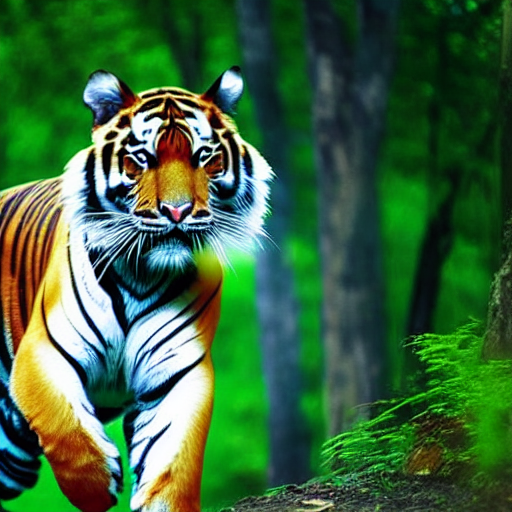

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("D:\Stable moje\VAE\data\\tokenizer_vocab.json", merges_file="D:\Stable moje\VAE\data\\tokenizer_merges.txt")
model_file = "D:\Stable moje\VAE\data\\v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE


prompt = "Amazing Bengal tiger in the nature wildlife forest, Tiger in wildlife realistic"
uncond_prompt = ""  
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

sampler = "ddpm"
num_inference_steps = 50
seed = None

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=0.3,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)


Image.fromarray(output_image)